<a href="https://colab.research.google.com/github/nephylum/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS9_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



Bayes Theorem
Here is is, the seemingly magic tool:

P(A|B)=P(B|A)P(A)P(B)

### Bayes Theorem

Here is is, the seemingly magic tool:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

In words - the probability of $A$ conditioned on $B$ is the probability of $B$ conditioned on $A$, times the probability of $A$ and divided by the probability of $B$. These unconditioned probabilities are referred to as "prior beliefs", and the conditioned probabilities as "updated."

In [0]:
from scipy import stats
import numpy as np

def prob_drunk_given_positive(prob_drunk_prior, positive_rate, false_positive_rate):
  # positive_rate = .99
  # use_rate = 1/200
  prob_drunk = (positive_rate * prob_drunk_prior)/((positive_rate * prob_drunk_prior) + (false_positive_rate*(1 - prob_drunk_prior)))
  return (prob_drunk)


In [12]:
#Replicating values from today's lesson
prob_drunk_given_positive(0.005, 0.99, .01)

0.33221476510067116

In [13]:
# In this example, imagine that individuals are taking a breathalyzer test with 
# an 8% false positive rate, a 100% true positive rate, and that our prior 
# belief about drunk driving in the population is 1/1000.

prob_drunk_given_positive(0.001, 1, .08)

0.012357884330202669

In [14]:
# What is the probability that a person is drunk after two positive
# breathalyzer tests?
# update prob_drunk_prior
prob_drunk_given_positive(0.012357884330202669, 1, .08) 

0.13525210993291495

In [15]:
prob_drunk_given_positive(0.13528210993291495, 1, .08)

0.6616571140664933

In [16]:
# How many positive breathalyzer tests are needed in order to have a 
# probability that's greater than 95% that a person is drunk beyond the 
# legal limit?
prob_drunk_given_positive(0.6616571140664933, 1, .08)

#4, according to these quick tests

0.9606991923353153

In [17]:
help(stats.bayes_mvs)

Help on function bayes_mvs in module scipy.stats.morestats:

bayes_mvs(data, alpha=0.9)
    Bayesian confidence intervals for the mean, var, and std.
    
    Parameters
    ----------
    data : array_like
        Input data, if multi-dimensional it is flattened to 1-D by `bayes_mvs`.
        Requires 2 or more data points.
    alpha : float, optional
        Probability that the returned confidence interval contains
        the true parameter.
    
    Returns
    -------
    mean_cntr, var_cntr, std_cntr : tuple
        The three results are for the mean, variance and standard deviation,
        respectively.  Each result is a tuple of the form::
    
            (center, (lower, upper))
    
        with `center` the mean of the conditional pdf of the value given the
        data, and `(lower, upper)` a confidence interval, centered on the
        median, containing the estimate to a probability ``alpha``.
    
    See Also
    --------
    mvsdist
    
    Notes
    -----
    Each

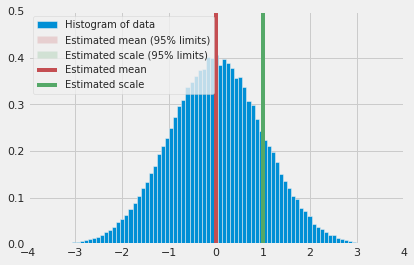

In [121]:
    >>> n_samples = 100000
    >>> data = stats.norm.rvs(size=n_samples)
    >>> res_mean, res_var, res_std = stats.bayes_mvs(data, alpha=0.95)
    
    >>> import matplotlib.pyplot as plt
    >>> fig = plt.figure()
    >>> ax = fig.add_subplot(111)
    >>> ax.hist(data, bins=100, density=True, label='Histogram of data')
    >>> ax.vlines(res_mean.statistic, 0, 0.5, colors='r', label='Estimated mean')
    >>> ax.axvspan(res_mean.minmax[0],res_mean.minmax[1], facecolor='r',
    ...            alpha=0.2, label=r'Estimated mean (95% limits)')
    >>> ax.vlines(res_std.statistic, 0, 0.5, colors='g', label='Estimated scale')
    >>> ax.axvspan(res_std.minmax[0],res_std.minmax[1], facecolor='g', alpha=0.2,
    ...            label=r'Estimated scale (95% limits)')
    
    >>> ax.legend(fontsize=10)
    >>> ax.set_xlim([-4, 4])
    >>> ax.set_ylim([0, 0.5])
    >>> plt.show()

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

n = 10000

test_d = stats.norm.rvs(size=n)


DescribeResult(nobs=10000, minmax=(-4.033020678687467, 3.6682457494177503), mean=0.020695329229545385, variance=1.0028276172653778, skewness=0.029321886942833893, kurtosis=0.06127753774499656)

In [59]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                 header=None, 
                 names=['party', 'handicapped-infants', 'water-project',
                        'budget', 'phyician-fee-freeze', 'el-salvador-aid',
                        'religious-groups', 'anti-satellite-ban', 
                        'aid-to-contras', 'mx-missile', 'immigration', 
                        'synfuels-corporation-cutback', 'education-spending', 
                        'superfund-right-to-sue', 'crime', 'duty-free', 
                        'south-africa'])

print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,phyician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [60]:
df = df.replace({'y': 1.0, 'n': 0.0, '?': np.NaN})
df.head()

,party,handicapped-infants,water-project,budget,phyician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [61]:
rep = df[df['party'] == 'republican']
rep.head()

,party,handicapped-infants,water-project,budget,phyician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [72]:
rep['crime']
# stats.ttest_1samp(rep['crime'], 1 ,nan_policy='omit')
test_p = stats.ttest_1samp(rep['crime'], 1 ,nan_policy='omit')
test_p

Ttest_1sampResult(statistic=-1.7429786813223835, pvalue=0.08325845614278887)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


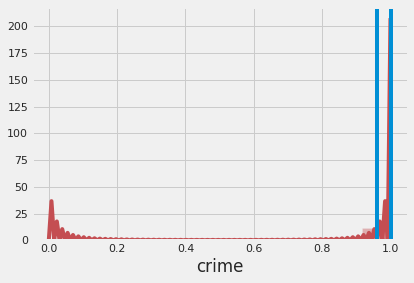

In [132]:
import seaborn as sns
from matplotlib import style

style.use('fivethirtyeight')

n = len(rep['crime'])
stderr = stats.sem(rep['crime'], nan_policy='omit')
moe = stderr * stats.t.ppf((1.95) / 2.0, n - 1)

ax = sns.distplot(rep['crime'], color='r')
ax.axvline(rep['crime'].mean() + moe,0)
ax.axvline(rep['crime'].mean() - moe,0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


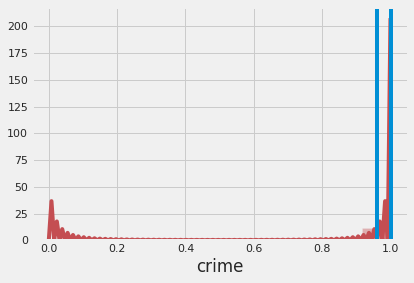

In [135]:
test_pnnan = rep['crime'].dropna()
bayes_test = stats.bayes_mvs(test_pnnan, alpha = 0.95)

ax = sns.distplot(rep['crime'], color='r')
ax.axvline(bayes_test[0][1][0] ,0)
ax.axvline(bayes_test[0][1][1] ,0)

AttributeError: ignored

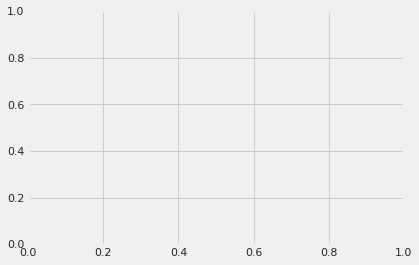

In [119]:
sns.kdeplot(bayes_test[0])

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!